In [ ]:

### please update Albumentations to version>=0.3.0 for `Lambda` transform support
!pip install -U albumentations>=0.3.0 --user 
!pip install -U --pre segmentation-models --user

In [ ]:
!python /content/drive/My\ Drive/Mask_RCNN/img_reshape.py

In [ ]:
!python /content/drive/My\ Drive/Mask_RCNN/mask.py

Traceback (most recent call last):
  File "/content/drive/My Drive/Mask_RCNN/mask.py", line 29, in <module>
    mask = Image.new('L', (img.shape[1], img.shape[0]), 0)
AttributeError: 'NoneType' object has no attribute 'shape'


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pandas as pd

In [ ]:
!pip install q tensorflow==2.1
!pip install q keras==2.3.1

In [ ]:
os.chdir('/content/drive/My Drive/wirerope/semantic/train')
lst   = os.listdir('/content/drive/My Drive/wirerope/semantic/train/imageafteraug')
lstm=os.listdir('/content/drive/My Drive/wirerope/semantic/train/maskafteraug')
print(lst)

['aug4_66.jpg', 'aug4_67.jpg', 'aug4_68.jpg', 'aug4_69.jpg', 'aug4_70.jpg', 'aug4_71.jpg', 'aug4_72.jpg', 'aug4_73.jpg', 'aug4_74.jpg', 'aug4_75.jpg', 'aug4_76.jpg', 'aug4_77.jpg', 'aug4_78.jpg', 'aug4_79.jpg', 'aug4_80.jpg', 'aug4_81.jpg', 'aug4_82.jpg', 'aug4_83.jpg', 'aug4_84.jpg', 'aug4_85.jpg', 'aug4_86.jpg', 'aug4_87.jpg', 'aug4_88.jpg', 'aug4_89.jpg', 'aug4_90.jpg', 'aug4_91.jpg', 'aug4_92.jpg', 'aug4_93.jpg', 'aug4_94.jpg', 'aug4_95.jpg', 'aug4_96.jpg', 'aug4_97.jpg', 'aug4_98.jpg', 'aug4_99.jpg', 'aug4_100.jpg', 'aug4_101.jpg', 'aug4_102.jpg', 'aug4_103.jpg', 'aug4_104.jpg', 'aug4_105.jpg', 'aug5_1.jpg', 'aug5_2.jpg', 'aug5_3.jpg', 'aug5_4.jpg', 'aug5_5.jpg', 'aug5_6.jpg', 'aug5_7.jpg', 'aug5_8.jpg', 'aug5_9.jpg', 'aug5_10.jpg', 'aug5_11.jpg', 'aug5_12.jpg', 'aug5_13.jpg', 'aug5_14.jpg', 'aug5_15.jpg', 'aug5_16.jpg', 'aug5_17.jpg', 'aug5_18.jpg', 'aug5_19.jpg', 'aug5_20.jpg', 'aug5_21.jpg', 'aug5_22.jpg', 'aug5_23.jpg', 'aug5_24.jpg', 'aug5_25.jpg', 'aug5_26.jpg', 'aug5_27.jpg

In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models

In [ ]:
import segmentation_models as sm

In [ ]:
import albumentations as A

In [ ]:
original_height,original_width =320,480
aug1 = A.PadIfNeeded(min_height=128, min_width=128, p=1)
aug2 = A.HorizontalFlip(p=1)
aug3 = A.IAAAdditiveGaussianNoise(p=0.2),
aug4 = A.VerticalFlip(p=1)
#aug5 = A.RandomRotate90(p=1)
#aug6 = A.Transpose(p=1)
aug5 = A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
aug6 = A.GridDistortion(p=1)
aug7 = A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1)
# aug10 = A.Compose([
#     A.OneOf([
#         A.RandomSizedCrop(min_max_height=(50, 101), height=original_height, width=original_width, p=0.5),
#         A.PadIfNeeded(min_height=original_height, min_width=original_width, p=0.5)
#     ], p=1),    
#     A.VerticalFlip(p=0.5),              
#     A.RandomRotate90(p=0.5),
#     A.OneOf([
#         A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03, p=0.5),
#         A.GridDistortion(p=0.5),
#         A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1)                  
#         ], p=0.8),
#     A.CLAHE(p=0.8),
#     A.RandomBrightnessContrast(p=0.8),    
#     A.RandomGamma(p=0.8)],
#     )


In [ ]:
 import matplotlib.pyplot as plt
 import os
 import numpy as np
 import cv2
 count=0
 path="/content/drive/My Drive/wirerope/semantic/test/testimg/"
 mask_path="/content/drive/My Drive/wirerope/semantic/test/testmask/"
 for file in os.listdir('/content/drive/My Drive/wirerope/semantic/test/testimg/'):

   if file.endswith(".jpg"):

      image=cv2.imread((os.path.join(path, file)))
      name=mask_path+file.split('.jpg')[0]+".npy"
      mask = np.load(name)
      #mask=cv2.imread(os.path.join(mask_path, name)) 
      # print(file)
      # print(image.shape)
     
      # print(mask.shape)
      # #print(transform_list1)
    
      # plt.show()
      augmented = aug1(image=image, mask=mask)
      #print(augmented)
      image_padded = augmented['image']
      # if not (image_padded.shape[0] == 512 and image_padded.shape[1] == 512):
      #   image_padded = cv2.resize(image_padded,(512,512))
     
      mask_padded = augmented['mask']
      print(mask_padded.shape)
      mask = np.array(mask_padded )
      #im2  = Image.fromarray(np.uint8(mask_padded))
      # if not (mask_padded.shape[0]==512 and mask_padded.shape[1]==512):
      #   im2 = im2.resize((512,512),resample=0)
      print(image_padded.shape)
      #print(mask_padded)
      #visualize(image_padded, mask_padded, original_image=image, original_mask=mask)
      count=count+1
      filename="augex1_"+str(count)+".jpg"
      filemask="/content/drive/My Drive/wirerope/semantic/train/mask_new/"+"augex1_"+str(count)+".npy"
      #cv2.imwrite(os.path.join("/content/drive/My Drive/wirerope/semantic/train/imgaug/",filename),image_padded)
      
      np.save(filemask,mask_padded)
      
      

In [ ]:
import os
print(len(os.listdir("/content/drive/My Drive/wirerope/semantic/train/maskaug")))

120


In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [ ]:
DATA_DIR = '/content/drive/My Drive/wirerope/instance/'

In [ ]:
!python /content/drive/My\ Drive/Mask_RCNN/mask.py

In [ ]:
print(len(os.listdir("/content/drive/My Drive/wirerope/semantic/train/maskresize")))

105


In [ ]:
x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'trainannot')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'valannot')

x_test_dir = os.path.join(DATA_DIR, 'test')
y_test_dir = os.path.join(DATA_DIR, 'testannot')

In [ ]:
# img="/content/drive/My Drive/wirerope/semantic/train/maskjpeg/augmented_image_1.jpg"
# im=Image.open(img)
# plt.imshow(im)
# plt.show()
from PIL import Image
image="/content/drive/My Drive/wirerope/semantic/train/maskresize/augmented_image_0.npy"
im=Image.open(image)
plt.imshow(im)
plt.show()

In [ ]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
    
# helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x
    

# classes for data loading and preprocessing
class Dataset:
    """CamVid Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    CLASSES = ['unlabelled', 'wirerope']
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        #print(self.ids)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        mask_ids=[]
        for image_id in self.ids:
          img_name=image_id

          img_name=img_name.split('.jpg')[0]+".npy"
          #print(img_name)
          mask_ids.append(img_name)
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in mask_ids]
        #print(self.masks_fps)
        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i])
        #print(image.shape)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(self.masks_fps[i])
        
        mask = np.load(self.masks_fps[i])
        # print(mask.shape)
        #mask= np.expand_dims(mask, axis =-1) 
        #mask=np.transpose(mask, (1, 2, 0))
        #mask = mask.astype(np.bool)
        #print(mask.shape)
        # print(type(mask))
        #print(self.class_values)
        # extract certain classes from mask (e.g. cars)
        masks = [(mask == v) for v in self.class_values]
        
        mask = np.stack(masks, axis=-1).astype('float')
        #print(mask.size)
        # print(mask.shape[-1])
        # # add background if mask is not binary
        # if mask.shape[-1] != 1:
        #     background = 1 - mask.sum(axis=-1, keepdims=True)
        #     mask = np.concatenate((mask, background), axis=-1)
        
        # # apply augmentations
        # if self.augmentation:
        #     sample = self.augmentation(image=image, mask=mask)
        #     image, mask = sample['image'], sample['mask']
        
        # # apply preprocessing
        # if self.preprocessing:
        #     sample = self.preprocessing(image=image, mask=mask)
        #     image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        return len(self.ids)
    
    
class Dataloder(keras.utils.Sequence):
    """Load data from dataset and form batches
    
    Args:
        dataset: instance of Dataset class for image loading and preprocessing.
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
    """
    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

        self.on_epoch_end()

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        # transpose list of lists
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return batch
    
    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)


(320, 480, 3)
(320, 480, 1)


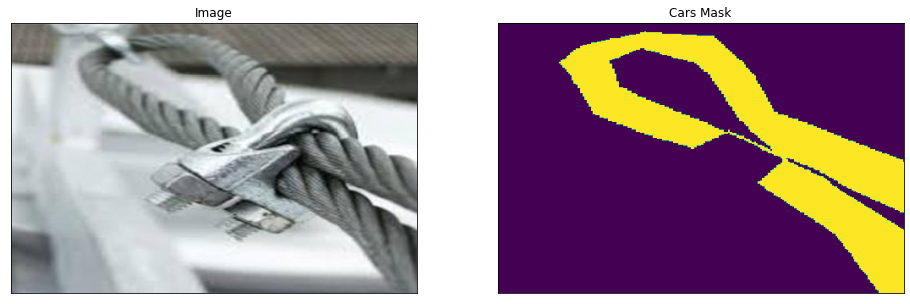

In [ ]:
x_train_dir="/content/drive/My Drive/wirerope/semantic/train/imageafteraug"
y_train_dir="/content/drive/My Drive/wirerope/semantic/train/maskafteraug"
dataset = Dataset(x_train_dir, y_train_dir, classes=['wirerope'])

image, mask = dataset[70] # get some sample
print(image.shape)
#print(mask[..., 2].squeeze())

print(mask.shape)
visualize(
    image=image, 
    cars_mask=mask[...,0].squeeze(),
)

In [ ]:
import albumentations as A

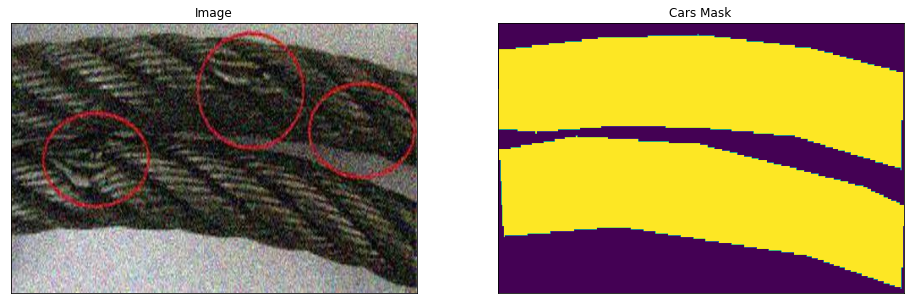

In [ ]:
# Lets look at augmented data we have
dataset = Dataset(x_train_dir, y_train_dir, classes=['wirerope'], augmentation=None)

image, mask = dataset[20] # get some sample
visualize(
    image=image, 
    cars_mask=mask[..., 0].squeeze(),
)

In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models

In [ ]:
pip install tensorflow==1.15

In [ ]:
!pip install q tensorflow==2.1
!pip install q keras==2.3.1

In [ ]:

import segmentation_models as sm

In [ ]:
BACKBONE = 'efficientnetb3'
BATCH_SIZE = 8
CLASSES = ['wirerope']
LR = 0.0001
EPOCHS = 40

preprocess_input = sm.get_preprocessing(BACKBONE)

In [ ]:
# define network parameters
n_classes = 1 if len(CLASSES) == 1 else (len(CLASSES) + 1)  # case for binary and multiclass segmentation
activation = 'sigmoid' if n_classes == 1 else 'softmax'

#create model
model= sm.Unet(BACKBONE, classes=n_classes, activation=activation)

In [ ]:
# define optomizer
import keras
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
#dice_loss = sm.losses.DiceLoss()
total_loss = sm.losses.BinaryFocalLoss() if n_classes == 1 else sm.losses.CategoricalFocalLoss()
#total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
model.compile(optim, total_loss, metrics)

In [ ]:


train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    classes=CLASSES, 
    augmentation=None,
    preprocessing=None,
)
x_valid_dir="/content/drive/My Drive/wirerope/semantic/val/imageafteraug"
y_valid_dir="/content/drive/My Drive/wirerope/semantic/val/maskafteraug"

# Dataset for validation images
valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    classes=CLASSES, 
    augmentation=None,
    preprocessing=None,
)

train_dataloader = Dataloder(train_dataset, batch_size=8, shuffle=True)
valid_dataloader = Dataloder(valid_dataset, batch_size=1, shuffle=False)

# check shapes for errors
assert train_dataloader[0][0].shape == (BATCH_SIZE, 320, 480, 3)
assert train_dataloader[0][1].shape == (BATCH_SIZE, 320, 480, n_classes)

# assert valid_dataloader[0][0].shape == (BATCH_SIZE, 320, 480, 3)
# assert valid_dataloader[0][1].shape == (BATCH_SIZE, 320, 480, n_classes)

# define callbacks for learning rate scheduling and best checkpoints saving
callbacks = [
    keras.callbacks.ModelCheckpoint('./best_model.h5', save_weights_only=True, save_best_only=True, mode='min'),
    keras.callbacks.ReduceLROnPlateau(),
]

In [ ]:
print(len(train_dataloader))
print(len(valid_dataloader))

91
77


In [ ]:
# train model
history = model.fit_generator(
    train_dataloader, 
    steps_per_epoch=len(train_dataloader), 
    epochs=EPOCHS, 
    callbacks=callbacks, 
    validation_data=valid_dataloader, 
    validation_steps=len(valid_dataloader),
)

Epoch 1/40
91/91 [==============================] - 163s 2s/step - loss: 0.5254 - iou_score: 0.5148 - f1-score: 0.6526 - val_loss: 0.9949 - val_iou_score: 0.3489 - val_f1-score: 0.4565
Epoch 2/40
91/91 [==============================] - 102s 1s/step - loss: 0.3029 - iou_score: 0.8032 - f1-score: 0.8887 - val_loss: 0.6742 - val_iou_score: 0.5773 - val_f1-score: 0.6883
Epoch 3/40
91/91 [==============================] - 102s 1s/step - loss: 0.2166 - iou_score: 0.8618 - f1-score: 0.9250 - val_loss: 0.5782 - val_iou_score: 0.6512 - val_f1-score: 0.7607
Epoch 4/40
91/91 [==============================] - 102s 1s/step - loss: 0.1717 - iou_score: 0.8873 - f1-score: 0.9399 - val_loss: 0.5557 - val_iou_score: 0.6801 - val_f1-score: 0.7808
Epoch 5/40
91/91 [==============================] - 102s 1s/step - loss: 0.1430 - iou_score: 0.9020 - f1-score: 0.9482 - val_loss: 0.5585 - val_iou_score: 0.6719 - val_f1-score: 0.7726
Epoch 6/40
91/91 [==============================] - 102s 1s/step - loss: 0.

In [ ]:
#model.save('/content/drive/My Drive/wirerope/wirerope_Unet_final.h5')

In [ ]:
from keras.models import load_model
model_unet=model.load_weights("/content/drive/My Drive/wirerope/wirerope_Unet_aug.h5")

In [ ]:
model

In [ ]:
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
test_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    classes=CLASSES, 
    augmentation=None,
    preprocessing=None,
)

test_dataloader = Dataloder(test_dataset, batch_size=1, shuffle=False)

In [ ]:
# x_test_dir="/content/drive/My Drive/wirerope/semantic/test/images/"
# y_test_dir="/content/drive/My Drive/wirerope/semantic/test/maskresize/"
x_test_dir="/content/drive/My Drive/wirerope/semantic/train/imagenewaug/"
y_test_dir="/content/drive/My Drive/wirerope/semantic/train/masknewaug/"
test_dataset = Dataset(
    x_test_dir, 
    y_test_dir, 
    classes=CLASSES, 
    augmentation=None,
    preprocessing=None,
)

test_dataloader = Dataloder(test_dataset, batch_size=1, shuffle=False)

In [ ]:
model.load_weights('best_model.h5')

In [ ]:
scores = model.evaluate_generator(valid_dataloader)

print("Loss: {:.5}".format(scores[0]))
for metric, value in zip(metrics, scores[1:]):
    print("mean {}: {:.5}".format(metric.__name__, value))

Loss: 0.53103
mean iou_score: 0.69703
mean f1-score: 0.79661


In [ ]:
n = 25
count=5
from PIL import Image

ids = np.random.choice(np.arange(len(valid_dataset)), size=n)
from google.colab.patches import cv2_imshow
for i in ids:
  count=count+1
  if count>10:
    image, gt_mask = valid_dataset[i]
    image = np.expand_dims(image, axis=0)
    #image_new = np.expand_dims(image, axis=0)
    image_new=np.expand_dims(image, axis=0)
    pr_mask = model.predict(image).round()
    image=image.squeeze()
    image_new=image_new.squeeze()
    pr_mask=pr_mask[...,0].squeeze()
    image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    #cv2.imwrite(os.path.join("/content/drive/My Drive/wirerope/predictions/test_image",filename),cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    plt.imshow(image)
    plt.show()
    #print(image.squeeze().shape)
    # print(pr_mask.shape)
    # print(pr_mask[...,0].shape)
    # print(pr_mask[...,0].squeeze().shape)
    # print(image.squeeze().shape[2])
    
    for j in range(image_new.shape[2]):
      #print(image[:,:,j].shape)
      image_new[:,:,j] = image_new[:,:,j] * pr_mask

    filename="res"+str(count)+".jpg"
    numpy_horizontal_concat = np.concatenate((image, cv2.cvtColor(image_new, cv2.COLOR_RGB2BGR)), axis=1)
    cv2_imshow(numpy_horizontal_concat)
    cv2.imwrite(os.path.join("/content/drive/My Drive/wirerope/predictions",filename),numpy_horizontal_concat)
    plt.figure(figsize=(8,8))
    #plt.imshow(image_new)
    #cv2.imwrite(os.path.join("/content/drive/My Drive/wirerope/predictions/result",filename),cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    plt.show()
    plt.imshow(pr_mask)
    print(pr_mask.shape)
   
    

150


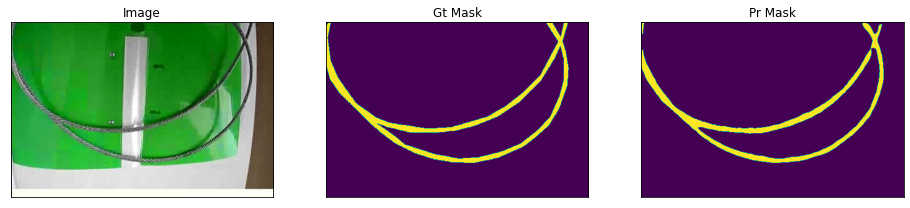

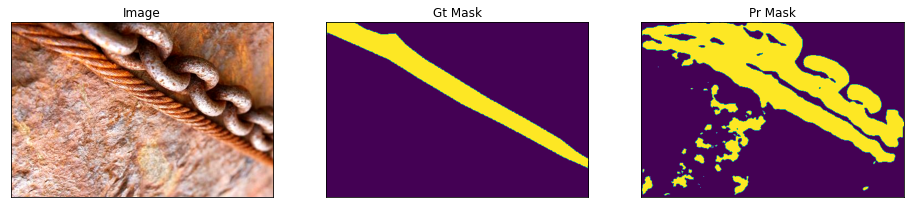

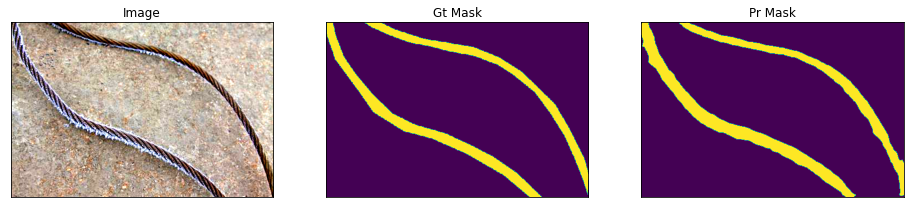

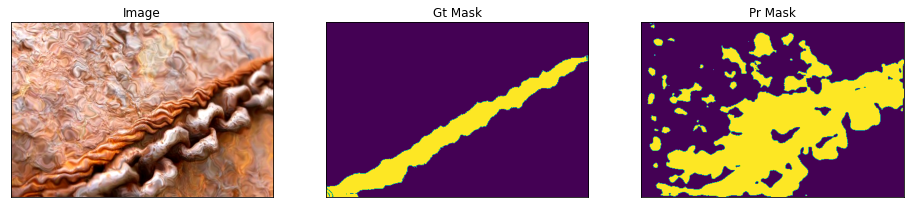

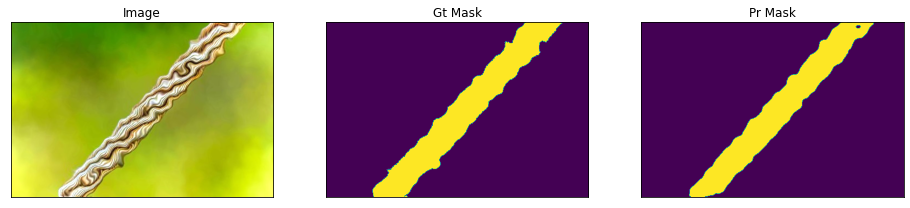

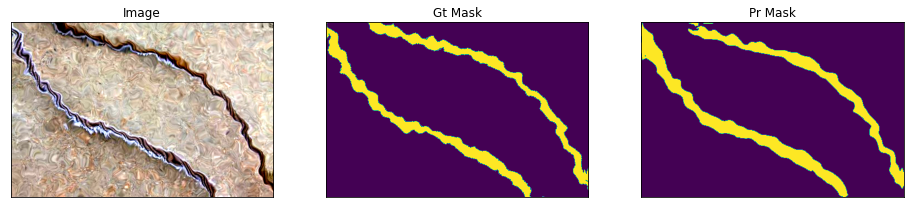

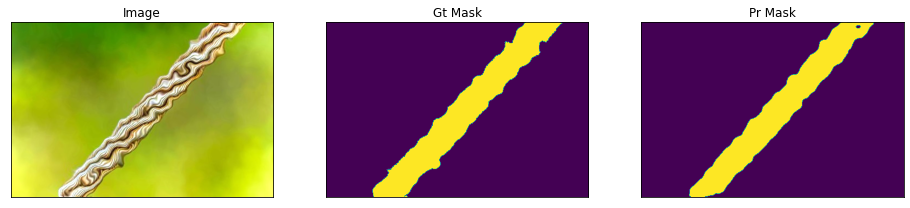

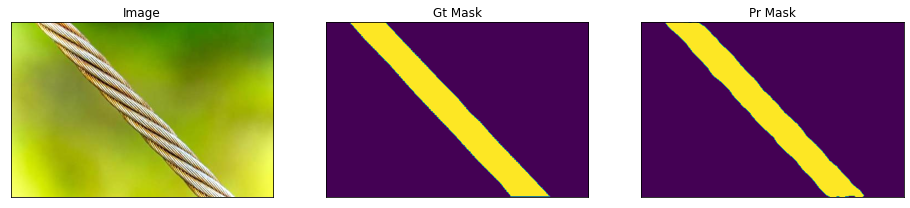

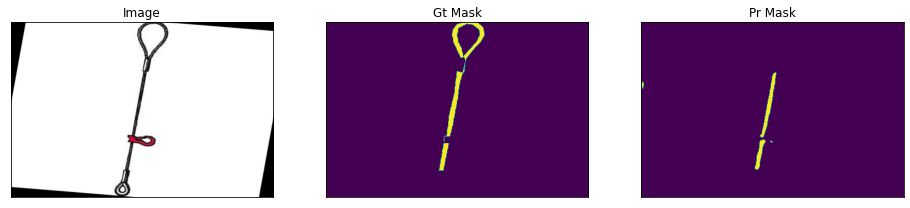

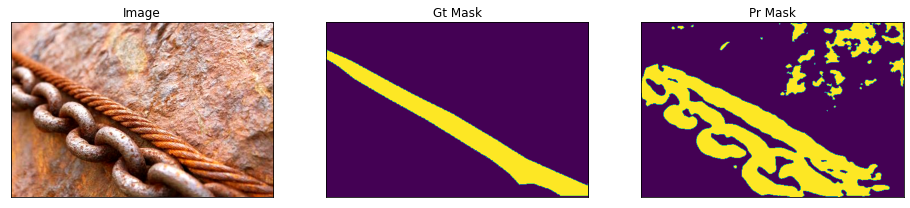

In [ ]:
n = 10
ids = np.random.choice(np.arange(len(valid_dataset)), size=n)
print(len(test_dataset))
#print(len(ids))
for i in ids:
    
    image, gt_mask = valid_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = model.predict(image).round()
    
    visualize(
        image=denormalize(image.squeeze()),
        gt_mask=gt_mask[..., 0].squeeze(),
        pr_mask=pr_mask[..., 0].squeeze(),
    )

In [ ]:
n = 10
ids = np.random.choice(np.arange(len(test_dataset)), size=n)

for i in ids:
    
    image, gt_mask = test_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = model.predict(image).round()
    image=image.squeeze()
    pr_mask=pr_mask[...,0].squeeze()
    plt.imshow(image)
    plt.show()
    #print(image.squeeze().shape)
    # print(pr_mask.shape)
    # print(pr_mask[...,0].shape)
    # print(pr_mask[...,0].squeeze().shape)
    # print(image.squeeze().shape[2])
    
    for j in range(image.shape[2]):
      #print(image[:,:,j].shape)
      image[:,:,j] = image[:,:,j] * pr_mask
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    plt.show()
    plt.imshow(pr_mask)
    plt.show()